In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pwd

/content


In [3]:
%cd /content/gdrive/MyDrive/XB00036/

/content/gdrive/MyDrive/XB00036


In [4]:
import pandas as pd

path = './data/market-price.csv'
bitcoin_df = pd.read_csv(path, names=['day','price'])

bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
bitcoin_df.head()

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


In [6]:
bitcoin_df.tail(10)

,day,price
355,2018-08-17 00:00:00,6476.900000
356,2018-08-18 00:00:00,6436.720833
357,2018-08-19 00:00:00,6404.063333
358,2018-08-20 00:00:00,6434.559167
359,2018-08-21 00:00:00,6401.246154
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


In [7]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

In [8]:
bitcoin_df.tail()

,day,price
360,2018-08-22,6575.229167
361,2018-08-23,6434.881667
362,2018-08-24,6543.645714
363,2018-08-25,6719.429231
364,2018-08-26,6673.274167


In [9]:
bitcoin_df.set_index('day', drop=True, inplace=True)

In [10]:
bitcoin_df.head()

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000


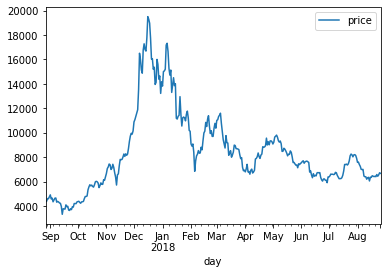

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
bitcoin_df.plot()
plt.show()

In [12]:
!pip uninstall statsmodels
!pip install statsmodels==0.12.2

Found existing installation: statsmodels 0.12.2
Uninstalling statsmodels-0.12.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.12.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.12.2
  Using cached statsmodels-0.12.2-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)


In [13]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(bitcoin_df.price.values, order = (3,1,3))
model_fit = model.fit(trend='C', full_output=True, disp=True)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2779.201
Method:                       css-mle   S.D. of innovations            500.312
Date:                Mon, 18 Oct 2021   AIC                           5574.402
Time:                        14:43:50   BIC                           5605.579
Sample:                             1   HQIC                          5586.794
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4106     27.641      0.232      0.817     -47.766      60.587
ar.L1.D.y     -0.2908      0.154     -1.889      0.059      -0.593       0.011
ar.L2.D.y     -0.6373      0.077     -8.279      0.000      -0.788      -0.486
ar.L3.D.y     -0.7095      0.148     -4.785      0.000      -1.000      -0.419
ma.L1.D.y      0.3949      0.140      2.813      0.005       0.120       0.670
ma.L2.D.y      0.6430      0.071      9.092      0.000       0.504       0.782
ma.L3.D.y      0.7423      0.131      5.660      0.000       0.485       0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2306           -0.9918j            1.0183           -0.2136
AR.2            0.2306           +0.9918j            1.0183            0.2136
AR.3           -1.3594           -0.0000j            1.3594           -0.5000
MA.1            0.2051           -1.0067j            1.0274           -0.2180
MA.2            0.2051           +1.0067j            1.0274            0.2180
MA.3           -1.2764           -0.0000j            1.2764           -0.5000
-----------------------------------------------------------------------------
"""

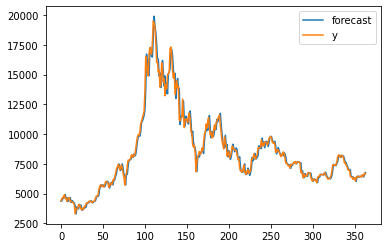

In [14]:
fig1 = model_fit.plot_predict()

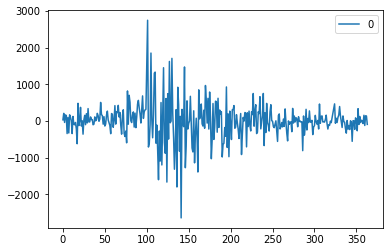

In [15]:
fig2 = pd.DataFrame(model_fit.resid).plot()

In [81]:
pred_y, _, conf_int = model_fit.forecast(steps=5)
pred_y_lower = conf_int[:,0]
pred_y_upper = conf_int[:,1]
pred_y

array([6668.33435645, 6630.30547078, 6624.48937162, 6670.82792419,
       6704.94545465])

In [82]:
test_path = './data/market-price-test.csv'
test_df = pd.read_csv(test_path, names=['day', 'price'])
test_y = test_df['price'].to_numpy()
test_y

array([6719.26615385, 7000.04      , 7054.27642857, 6932.6625    ,
       6981.94615385])

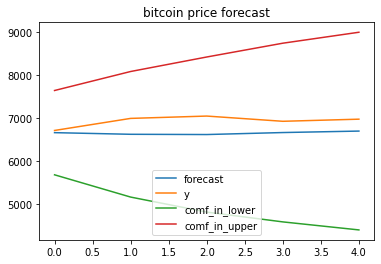

In [83]:
plt.plot(pred_y, label='forecast')
plt.plot(test_y, label='y')
plt.plot(pred_y_lower, label='comf_in_lower')
plt.plot(pred_y_upper, label='comf_in_upper')
plt.title('bitcoin price forecast')
plt.legend()
plt.show()

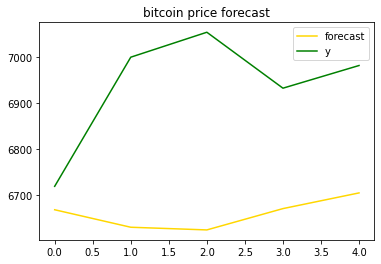

In [84]:
plt.plot(pred_y, color='gold', label='forecast')
plt.plot(test_y, color='green', label='y')
plt.title('bitcoin price forecast')
plt.legend()
plt.show()

In [85]:
from fbprophet import Prophet

path = './data/market-price.csv'
bitcoin_df = pd.read_csv(path, names=['ds', 'y'])
bitcoin_df.info()

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      365 non-null    object 
 1   y       365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [86]:
future_data = prophet.make_future_dataframe(periods=5, freq='d')
future_data.info()
future_data.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      370 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


,ds
360,2018-08-22
361,2018-08-23
362,2018-08-24
363,2018-08-25
364,2018-08-26
365,2018-08-27
366,2018-08-28
367,2018-08-29
368,2018-08-30
369,2018-08-31


In [87]:
forecast_data = prophet.predict(future_data)
forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          370 non-null    datetime64[ns]
 1   trend                       370 non-null    float64       
 2   yhat_lower                  370 non-null    float64       
 3   yhat_upper                  370 non-null    float64       
 4   trend_lower                 370 non-null    float64       
 5   trend_upper                 370 non-null    float64       
 6   daily                       370 non-null    float64       
 7   daily_lower                 370 non-null    float64       
 8   daily_upper                 370 non-null    float64       
 9   multiplicative_terms        370 non-null    float64       
 10  multiplicative_terms_lower  370 non-null    float64       
 11  multiplicative_terms_upper  370 non-null    float64       

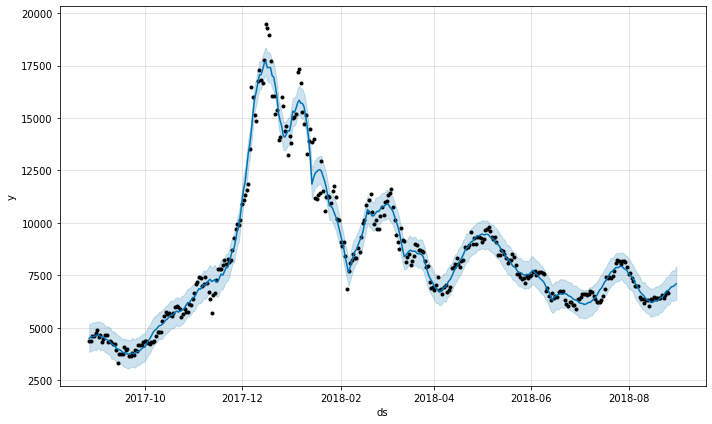

In [88]:
fig3 = prophet.plot(forecast_data)

In [89]:
forecast_data.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
360,2018-08-22,579.818423,5762.568661,7125.104284,579.818423,579.818423,10.907431,10.907431,10.907431,10.116590,10.116590,10.116590,-0.055193,-0.055193,-0.055193,-0.735648,-0.735648,-0.735648,0.0,0.0,0.0,6445.603647
361,2018-08-23,582.869521,5896.039091,7204.799653,582.869521,582.869521,10.907431,10.907431,10.907431,10.217431,10.217431,10.217431,-0.029402,-0.029402,-0.029402,-0.660598,-0.660598,-0.660598,0.0,0.0,0.0,6538.298694
362,2018-08-24,585.920620,5964.233220,7303.963383,585.920620,585.920620,10.907431,10.907431,10.907431,10.366844,10.366844,10.366844,0.039476,0.039476,0.039476,-0.580063,-0.580063,-0.580063,0.0,0.0,0.0,6660.068528
363,2018-08-25,588.971718,6075.492568,7436.701919,588.971718,588.971718,10.907431,10.907431,10.907431,10.472413,10.472413,10.472413,0.064010,0.064010,0.064010,-0.499029,-0.499029,-0.499029,0.0,0.0,0.0,6756.926780
364,2018-08-26,592.022817,6103.642250,7413.509634,592.022817,592.022817,10.907431,10.907431,10.907431,10.447592,10.447592,10.447592,-0.037457,-0.037457,-0.037457,-0.422382,-0.422382,-0.422382,0.0,0.0,0.0,6777.235659
365,2018-08-27,595.073916,6148.191166,7581.346841,595.073916,595.073916,10.907431,10.907431,10.907431,10.544862,10.544862,10.544862,-0.007796,-0.007796,-0.007796,-0.354773,-0.354773,-0.354773,0.0,0.0,0.0,6870.046369
366,2018-08-28,598.125014,6336.150342,7699.972340,598.125014,598.125014,10.907431,10.907431,10.907431,10.633309,10.633309,10.633309,0.026363,0.026363,0.026363,-0.300485,-0.300485,-0.300485,0.0,0.0,0.0,6958.173352
367,2018-08-29,601.176113,6261.474741,7725.115510,601.176113,602.334651,10.907431,10.907431,10.907431,10.588920,10.588920,10.588920,-0.055193,-0.055193,-0.055193,-0.263318,-0.263318,-0.263318,0.0,0.0,0.0,6966.981989
368,2018-08-30,604.227211,6329.355637,7732.829599,603.316680,612.246456,10.907431,10.907431,10.907431,10.631542,10.631542,10.631542,-0.029402,-0.029402,-0.029402,-0.246487,-0.246487,-0.246487,0.0,0.0,0.0,7028.094432
369,2018-08-31,607.278310,6332.767290,7939.833569,598.758602,624.842498,10.907431,10.907431,10.907431,10.694373,10.694373,10.694373,0.039476,0.039476,0.039476,-0.252535,-0.252535,-0.252535,0.0,0.0,0.0,7101.738804


In [90]:
forecast_data[-5:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
365,2018-08-27,595.073916,6148.191166,7581.346841,595.073916,595.073916,10.907431,10.907431,10.907431,10.544862,10.544862,10.544862,-0.007796,-0.007796,-0.007796,-0.354773,-0.354773,-0.354773,0.0,0.0,0.0,6870.046369
366,2018-08-28,598.125014,6336.150342,7699.972340,598.125014,598.125014,10.907431,10.907431,10.907431,10.633309,10.633309,10.633309,0.026363,0.026363,0.026363,-0.300485,-0.300485,-0.300485,0.0,0.0,0.0,6958.173352
367,2018-08-29,601.176113,6261.474741,7725.115510,601.176113,602.334651,10.907431,10.907431,10.907431,10.588920,10.588920,10.588920,-0.055193,-0.055193,-0.055193,-0.263318,-0.263318,-0.263318,0.0,0.0,0.0,6966.981989
368,2018-08-30,604.227211,6329.355637,7732.829599,603.316680,612.246456,10.907431,10.907431,10.907431,10.631542,10.631542,10.631542,-0.029402,-0.029402,-0.029402,-0.246487,-0.246487,-0.246487,0.0,0.0,0.0,7028.094432
369,2018-08-31,607.278310,6332.767290,7939.833569,598.758602,624.842498,10.907431,10.907431,10.907431,10.694373,10.694373,10.694373,0.039476,0.039476,0.039476,-0.252535,-0.252535,-0.252535,0.0,0.0,0.0,7101.738804


In [91]:
pred_y2 = forecast_data.yhat.values[-5:]
pred_y2_lower = forecast_data.yhat_lower.values[-5:]
pred_y2_upper = forecast_data.yhat_upper.values[-5:]

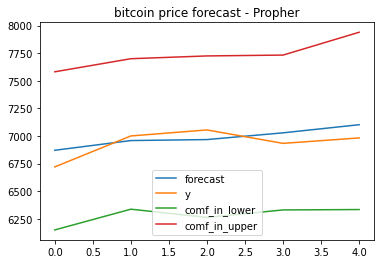

In [92]:
plt.plot(pred_y2, label='forecast')
plt.plot(test_y, label='y')
plt.plot(pred_y2_lower, label='comf_in_lower')
plt.plot(pred_y2_upper, label='comf_in_upper')
plt.title('bitcoin price forecast - Propher')
plt.legend()
plt.show()

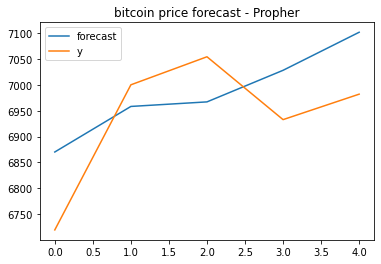

In [93]:
plt.plot(pred_y2, label='forecast')
plt.plot(test_y, label='y')
plt.title('bitcoin price forecast - Propher')
plt.legend()
plt.show()

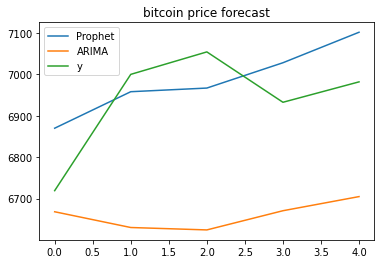

In [94]:
plt.plot(pred_y2, label='Prophet')
plt.plot(pred_y, label='ARIMA')
plt.plot(test_y, label='y')
plt.title('bitcoin price forecast')
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('RMSE')
print('- ARIMA : ', sqrt(mean_squared_error(pred_y, test_y)))
print('- Prophet : ', sqrt(mean_squared_error(pred_y2, test_y)))

RMSE
- ARIMA :  306.36622426579856
- Prophet :  105.41853842279897
